In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd/gdrive/MyDrive/Gender Classification/

/gdrive/MyDrive/Gender Classification


In [ ]:
ls

female/  male/


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [ ]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=20
CHANNELS=3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Gender Classification",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3491 files belonging to 2 classes.


In [ ]:
class_names = dataset.class_names
class_names

['female', 'male']

In [ ]:
len(dataset)

57

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[129.       106.        56.      ]
  [129.       106.        56.      ]
  [130.16406  107.16406   57.164062]
  ...
  [192.67188  161.54492  122.96289 ]
  [195.       163.       125.      ]
  [195.       163.       125.      ]]

 [[130.05273  107.052734  57.052734]
  [130.05273  107.052734  57.052734]
  [131.2168   108.2168    58.216797]
  ...
  [193.07928  161.82103  123.17614 ]
  [195.45117  163.45117  125.30078 ]
  [195.45117  163.45117  125.30078 ]]

 [[133.08789  110.08789   60.08789 ]
  [133.08789  110.08789   60.08789 ]
  [134.25195  111.25195   61.251953]
  ...
  [194.25388  162.61708  123.79096 ]
  [196.75195  164.75195  126.16797 ]
  [196.75195  164.75195  126.16797 ]]

 ...

 [[124.24805   84.83203   47.08008 ]
  [124.24805   84.83203   47.08008 ]
  [119.421844  80.00583   42.25388 ]
  ...
  [156.31851  111.31852   53.73649 ]
  [157.33594  112.33594   55.335938]
  [157.33594  112.33594   55.335938]]

 [[125.54883   85.69922   49.248047]
  [125.5

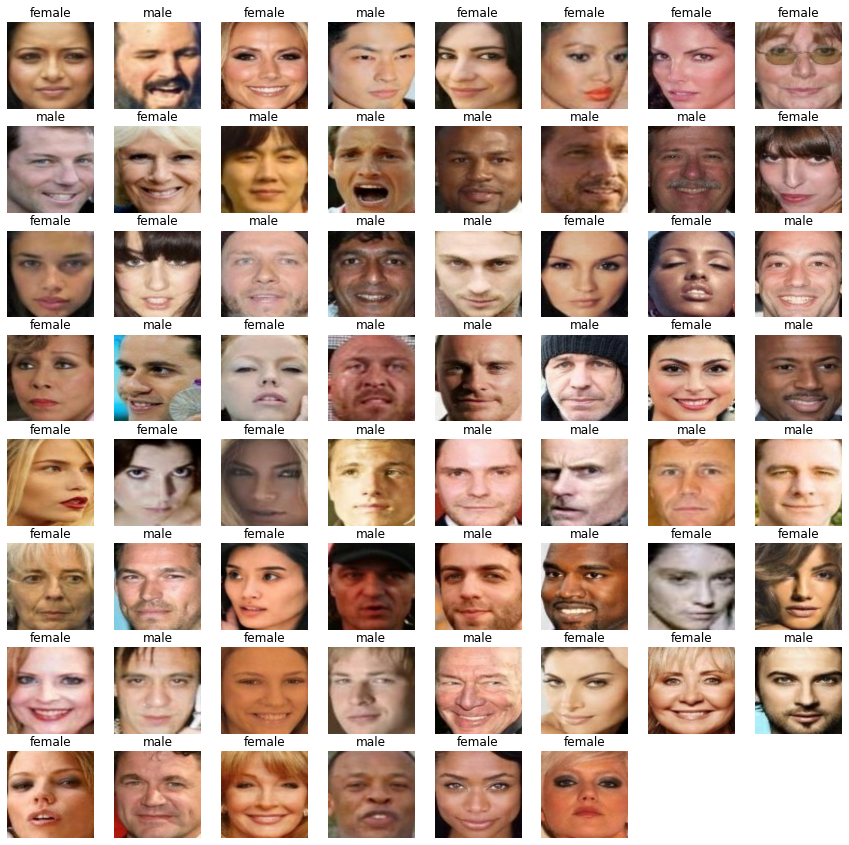

In [ ]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
45/45 [==============================] - 537s 7s/step - loss: 0.7958 - accuracy: 0.5086 - val_loss: 0.7038 - val_accuracy: 0.4935
Epoch 2/20
45/45 [==============================] - 290s 6s/step - loss: 0.6859 - accuracy: 0.5435 - val_loss: 0.7208 - val_accuracy: 0.5677
Epoch 3/20
45/45 [==============================] - 290s 6s/step - loss: 0.5586 - accuracy: 0.7142 - val_loss: 0.5475 - val_accuracy: 0.6774
Epoch 4/20
45/45 [==============================] - 291s 6s/step - loss: 0.4922 - accuracy: 0.7677 - val_loss: 0.4795 - val_accuracy: 0.7710
Epoch 5/20
45/45 [==============================] - 290s 6s/step - loss: 0.4321 - accuracy: 0.8082 - val_loss: 0.4812 - val_accuracy: 0.7419
Epoch 6/20
45/45 [==============================] - 289s 6s/step - loss: 0.3989 - accuracy: 0.8300 - val_loss: 0.3913 - val_accuracy: 0.8323
Epoch 7/20
45/45 [==============================] - 290s 6s/step - loss: 0.3553 - accuracy: 0.8518 - val_loss: 0.3176 - val_accuracy: 0.8613
Epoch 8/20
45

In [29]:
model.evaluate(test_ds)

7/7 [==============================] - 14s 2s/step - loss: 0.0799 - accuracy: 0.9608


[0.07988861203193665, 0.960829496383667]

In [30]:
acc = history.history['accuracy']
loss = history.history['loss']

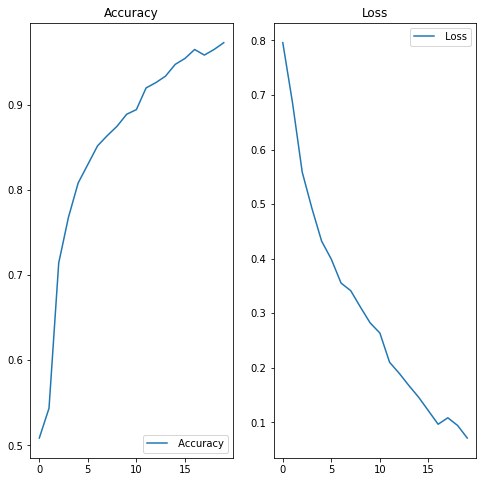

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

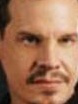

In [24]:
image_path = "/gdrive/My Drive/0100.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [25]:
pred = model.predict(scaled_img)

In [26]:
output = class_names[np.argmax(pred)]

In [27]:
output

'male'

In [28]:
model.save("Gender Classification.h5")